# Спецификация к Лабораторной работе №7 

# Упорядочение массива методами простого выбора и «пузырька».

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программы упорядочения одномерного массива двумя методами: 
    
- методом простого выбора и 

- методом «пузырька».

#### Условие: 
Заданный целочисленный массив $\{A_1, A_2, …, A_n\}$ отсортировать в порядке убывания (минимум - в конец). 

Порядок элементов выводить на экран после каждого прохода по массиву.

### 2. Уточненная постановка задачи.
Дан одномерный целочисленный массив A из n элементов.

1) Выполнить сортировку методом простого выбора: 

на каждом i-ом этапе сортировки поменять местами 

- минимальный элемент массива $\{A_1, A_2, …, A_{n - i + 1}\}$ с индексом k и 

- элемент с индексом (n - i + 1).

2) Выполнить сортировку методом "пузырька": 

- на очередном этапе сравниваются все соседние элементы, 

- в каждой паре элементы меняются местами, если первый элемент меньше второго,

- последний элемент полученного массива исключается из анализа на следующем этапе.

### 3. Пример с иллюстрацией.

In [1]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [2]:
A1 = numpy.random.randint(-100,100, size=20)
numpy.savetxt('A_Lab7_1.txt', A1, fmt='%5.0f')
As1 = numpy.sort(A1)[::-1]
str(list(A1)), str(list(As1))

('[-78, 26, -3, 32, -48, -97, -80, 49, 86, -32, 91, 58, 82, 19, 98, -65, -93, 40, 6, -47]',
 '[98, 91, 86, 82, 58, 49, 40, 32, 26, 19, 6, -3, -32, -47, -48, -65, -78, -80, -93, -97]')

In [21]:
A2 = numpy.random.randint(0, 2, size=20)
numpy.savetxt('A_Lab7_2.txt', A2, fmt='%5.0f')
As2 = numpy.sort(A2)[::-1]
print('\n', A2, '\n', As2)


 [1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0] 
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [27]:
A3 = numpy.random.randint(1, 10, size=5)
numpy.savetxt('A_Lab7_3.txt', A3, fmt='%5.0f')
As3 = numpy.sort(A3)[::-1]
print('\n', A3, '\n', As3)


 [1 6 7 9 5] 
 [9 7 6 5 1]


In [30]:
A4 = numpy.random.randint(-100, 0, size=10)
numpy.savetxt('A_Lab7_4.txt', A4, fmt='%5.0f')
As4 = numpy.sort(A4)[::-1]
print('\n', A4, '\n', As4)


 [-75 -75 -11 -15  -7 -79 -86 -37 -65 -32] 
 [ -7 -11 -15 -32 -37 -65 -75 -75 -79 -86]


In [32]:
A5 = numpy.random.randint(0, 1000, size=10)
numpy.savetxt('A_Lab7_5.txt', A5, fmt='%5.0f')
As5 = numpy.sort(A5)[::-1]
print('\n', A5, '\n', As5)


 [178 388 727 186 412  87 324 852 190 652] 
 [852 727 652 412 388 324 190 186 178  87]


In [22]:
# A_Lab7_1.txt, A_Lab7_2.txt, A_Lab7_3.txt, A_Lab7_4.txt, A_Lab7_5.txt
# As_Lab7_1.txt, As_Lab7_2.txt, As_Lab7_3.txt, As_Lab7_4.txt, As_Lab7_5.txt

print(20*' ' + 'Лаб.7\n' + 90*'=')

fin = str(input('Текстовый файл с элементами массива A: '))
fout = str(input('Текстовый файл с элементами массива A и элементами сортированного массива A: '))

with open(fin, 'r') as f:
    A = [int(x) for x in f.readlines()]
    
with open(fout, 'w') as f:
    f.write("{}\n".format(A))
    
method = str(input('Выберете метод сортировки массива A (simple или bubble): '))
    
print(90*'=' + '\n' + 'Сортировка массива A: \n')

def simple_sort(A):
    AA = []
    for j in range(len(A)-1):
        print(j)
        print(A)
        AA.extend(A)
        MIN, k = A[len(A)-j-1], -1
        for i in range(len(A)-j-2, -1, -1):
            if MIN > A[i]: 
                MIN = A[i]
                k = i
        if k > -1:
            A[k] = A[len(A)-j-1]
            A[len(A)-j-1] = MIN
    return AA

def bubble_sort(A):
    AA = []
    for j in range(len(A)-1):
        print(A)
        AA.extend(A)
        c = 0
        for i in range(len(A)-j-1):
            if A[i] < A[i+1]: 
                MIN = A[i]
                A[i] = A[i+1]
                A[i+1] = MIN
                c += 1
        if c < 1:  break
    return AA
            
if method == 'simple': 
    AA = simple_sort(A)  
elif method == 'bubble': 
    AA = bubble_sort(A)   
else: 
    print('Неправильный ввод названия метода сортировки')

with open(fout, 'w') as f:
    f.write("{}".format(A))

                    Лаб.7
Текстовый файл с элементами массива A: A_Lab7_1.txt
Текстовый файл с элементами массива A и элементами сортированного массива A: As_Lab7_1.txt
Выберете метод сортировки массива A (simple или bubble): bubble
Сортировка массива A: 

[-78, 26, -3, 32, -48, -97, -80, 49, 86, -32, 91, 58, 82, 19, 98, -65, -93, 40, 6, -47]
[26, -3, 32, -48, -78, -80, 49, 86, -32, 91, 58, 82, 19, 98, -65, -93, 40, 6, -47, -97]
[26, 32, -3, -48, -78, 49, 86, -32, 91, 58, 82, 19, 98, -65, -80, 40, 6, -47, -93, -97]
[32, 26, -3, -48, 49, 86, -32, 91, 58, 82, 19, 98, -65, -78, 40, 6, -47, -80, -93, -97]
[32, 26, -3, 49, 86, -32, 91, 58, 82, 19, 98, -48, -65, 40, 6, -47, -78, -80, -93, -97]
[32, 26, 49, 86, -3, 91, 58, 82, 19, 98, -32, -48, 40, 6, -47, -65, -78, -80, -93, -97]
[32, 49, 86, 26, 91, 58, 82, 19, 98, -3, -32, 40, 6, -47, -48, -65, -78, -80, -93, -97]
[49, 86, 32, 91, 58, 82, 26, 98, 19, -3, 40, 6, -32, -47, -48, -65, -78, -80, -93, -97]
[86, 49, 91, 58, 82, 32, 98, 26, 19, 40

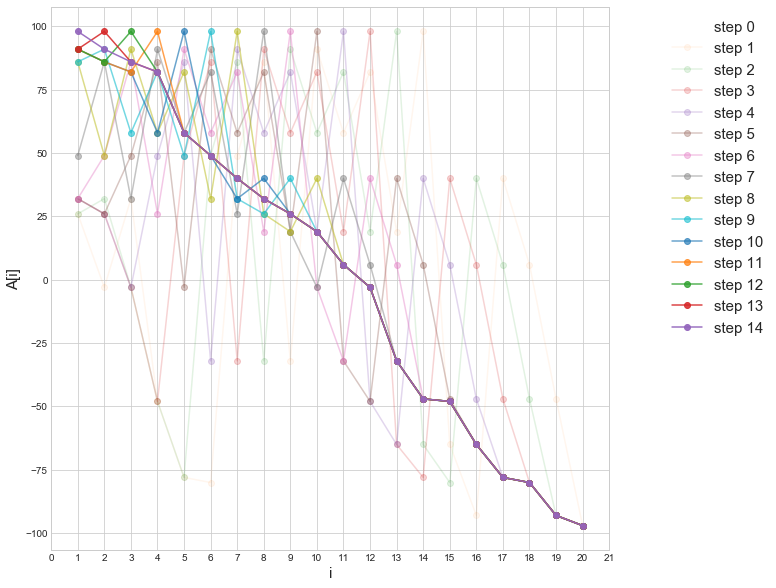

In [35]:
pylab.figure(figsize=(10,10))
for i in range(int(len(AA)/20)):
    pylab.plot(range(20), AA[20*i:20*(i+1)], '-o', 
               alpha=20*i/len(AA), label='step {}'.format(i))

pylab.xlabel('i', fontsize=15) 
pylab.ylabel('A[i]', fontsize=15)
pylab.xticks(range(-1, len(A)+1), range(len(A)+2));
pylab.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.3,1.0));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива А | символ | строка | "+XX.txt" |
| входные данные | fout | название текстового файла с элементами массива А | символ | строка | "+XX.txt" |
| входные данные | method | название метода сортировки массива А | символ | строка | "+XX" |
| входные данные | A | вводимые из текстового файла числа исходного массива | цел | одномерный массив | +XX (:5) |
| выходные данные | A | выводимые в текстовый файл числа сортированного массива | цел | одномерный массив | +XX (:5) |
| промежуточные данные | MIN | минимальный элемент при сортировке | цел | простая переменная | --- |
| промежуточные данные | k | индекс минимального элемент при сортировке | цел | простая переменная | --- |
| промежуточные данные | i | индекс текущего элемента, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | j | индекс текущего элемента, 1≤j≤50 | цел | простая переменная | --- |
| промежуточные данные | c | подсчет количества перестановок элементов, 0≤c≤49 | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 1.2 Текстовый файл с элементами массива A и элементами сортированного массива A: $<fout>$
- обр 2 Выберете метод сортировки массива A (simple или bubble): $<method>$
- обр 3.1 Сортировка массива A:
- обр 3.2 $ < A[1] >  < A[2] >  …  < A[n] > $

### 6. Выходная форма

- обр 4 Лаб. 7
- обр 5.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 5.2 Текстовый файл с элементами массива A и элементами сортированного массива A: $<fout>$
- обр 6 Выберете метод сортировки массива A (simple или bubble): $<method>$
- обр 7.1 Сортировка массива A:
- обр 7.2 $ < A[1] > < A[2] > … < A[n] > \\ ... \\ < A[1] > < A[2] > … < A[n] > $

### 7. Аномалии

-

### 8. Функциональные тесты

| Исходные данные | - | - | - | Результаты | Тест |
| :-: | :-: | :-: | :-: | :-: | :-: |
| fin | fout | method | A | A | № |
| A_Lab7_1.txt | As_Lab7_1.txt | `bubble` | `[-78  26  -3  32 -48 -97 -80  49  86 -32  91  58  82  19  98 -65 -93  40 6 -47]` | `[98  91  86  82  58  49  40  32  26  19   6  -3 -32 -47 -48 -65 -78 -80 -93 -97]` | 1 | 
| - | - | - | - | - | - |
| A_Lab7_2.txt | As_Lab7_2.txt | `simple` | `[1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0]` | `[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]` | 2 |
| - | - | - | - | - | - |
| A_Lab7_3.txt | As_Lab7_3.txt | `bubble` | `[1 6 7 9 5]` | `[9 7 6 5 1]` | 3 |
| - | - | - | - | - | - |
| A_Lab7_4.txt | As_Lab7_4.txt | `simple` | `[-75 -75 -11 -15 -7 -79 -86 -37 -65 -32]` | `[-7 -11 -15 -32 -37 -65 -75 -75 -79 -86]` | 4 |
| - | - | - | - | - | - |
| A_Lab7_5.txt | As_Lab7_5.txt | `bubble` | `[178 388 727 186 412 87 324 852 190 652]` | `[852 727 652 412 388 324 190 186 178  87]` | 5 |

| № теста | Входные  данные | - | - | - | Ожидаемый результат | Смысл теста |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| - | - | - | - | - | - | - |
| 1 | fin = 'A_Lab7_1.txt' | fout = 'As_Lab7_1.txt' |  method = 'bubble' | A = `[-78  26  -3  32 -48 -97 -80  49  86 -32  91  58  82  19  98 -65 -93  40 6 -47]` | A = `[98  91  86  82  58  49  40  32  26  19   6  -3 -32 -47 -48 -65 -78 -80 -93 -97]` | Подтвердить правильность расчетов для широкого спектра целочисленных значений |
| - | - | - | - | - | - | - |
| 2 | fin = 'A_Lab7_2.txt' | fout = 'As_Lab7_2.txt' | method = 'simple' | A = `[1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0]` | A = `[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]` | Протестировать простейший случай с бинарными значениями |
| - | - | - | - | - | - | - |
| 3 | fin = 'A_Lab7_3.txt' | fout = 'As_Lab7_3.txt' | method = 'bubble' | A = `[1 6 7 9 5]` | A = `[9 7 6 5 1]` | Протестировать случай сортировки натуральных чисел|
| - | - | - | - | - | - | - |
| 4 | fin = 'A_Lab7_4.txt' | fout = 'As_Lab7_4.txt' | method = 'simple' | A = `[-75 -75 -11 -15 -7 -79 -86 -37 -65 -32]` | A = `[-7 -11 -15 -32 -37 -65 -75 -75 -79 -86]` | Подтвердить правильность расчетов в случае отрицательных чисел |
| - | - | - | - | - | - | - |
| 5 | fin = 'A_Lab7_5.txt' | fout = 'As_Lab7_5.txt' | method = 'bubble' | A = `[178 388 727 186 412 87 324 852 190 652]` | A = `[852 727 652 412 388 324 190 186 178  87]` | Протестировать массив, состоящий из неотрицательных чисел |

| Метод | - | Результаты | № теста |
| :-: | :-: | :-: | :-: |
| - | - | - | - |
| bubble | A | 14 этапов сортировки, корректный результат  | 1 |
| - | - | - | - |
| simple | A | 19 этапов сортировки, корректный результат | 2 |
| - | - | - | - |
| bubble | A | 3 этапа сортировки, корректный результат | 3 |
| - | - | - | - |
| simple | A | 9 этапов сортировки, корректный результат | 4 |
| - | - | - | - |
| bubble | A | 7 этапов сортировки, корректный результат | 5 |

### 9. Метод
Отделим ввод-вывод от обработки данных и разделим задачу на три подзадачи:

1.	_Подзадача А 0.1._ Запросить названия текстовых файлов ввода-вывода, считать из текстового файла ввода исходные данные (обр.1-3), затем вывести их на экран (обр.4-7.1) для визуального подтверждения.
2.	_Подзадача А 0.2._ Решение поставленной задачи: на основе введенных исходных данных (`A`) сформировать сортированный одним из заданных методов (`simple`, `bubble`) массив (`A`)   
3.	_Подзадача А 0.3._ Ввести полученные результаты (`A`) на экран (обр.7.2) и записать в файл вывода исходный массив и полученный результат.

Ввод-вывод тривиален и представляет собой чисто техническую задачу. 

Для осуществления процесса ввода-вывода и обработки массива потребуются промежуточные переменные: 

- `i` – индекс текущего элемента массива, 

- `j` – индекс текущего элемента массива,

- `k` - индекс минимального элемент при сортировке,

- `MIN` - минимальный элемент при сортировке,

- `c` - подсчет количества перестановок элементов.

Их следует добавить в таблицу данных. 

Алгоритм необходим только для обработка входных данных и расчета результата. 